 # Обработка пропусков в данных

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
data = pd.read_csv('/Users/a.fedorova/Desktop/учеба/Великолепная мага/2 сем/датасеты/AB_NYC_2019.csv', sep=",")

In [3]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
data.shape

(48895, 16)

In [5]:
data.dtypes


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [6]:
data.isnull().sum()


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [14]:
data.isnull().mean()

id                                0.000000
name                              0.000327
host_id                           0.000000
host_name                         0.000429
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.205583
reviews_per_month                 0.205583
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

#### Можно и необходимо удалить 2 непоказательных столбца - reviews_per_month, last_review так как в этих столбцах наблюдается более 20% пропущенных значений.

In [8]:
# Колонки, которые можно удалить:
colsForDel = ['last_review', 'reviews_per_month']

In [17]:
dataWithoutColumns = data.drop(columns=colsForDel)
dataWithoutColumns.shape

(48895, 14)

### Таким образом мы получили более достоверные данные, при этом потеряли 2 из 16 признаков, но не потеряли количество строк

# тут продолжить

Видно, что таким способом мы потеряли больше 20% датасета. В моем случае такие потери данных критичны так как я взяла небольшой датасет.

In [49]:
num_cols = []
for col in data.columns:
    null_count = data[data[col].isnull()].shape[0]
    col_type = str(data[col].dtype)
    if null_count>0 and (col_type=='float64' or col_type=='int64'):
        num_cols.append(col)
        temp_perc = round((null_count / data.shape[0]) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, col_type, null_count, temp_perc))

Колонка GDP ($ per capita). Тип данных float64. Количество пустых значений 1, 0.44%.


Получается, в моем датасете только одна колонка с нулевым значением в числовой фиче. Причем, нулевое значение только одно.

In [50]:
null_index = data[data['GDP ($ per capita)'].isnull()].index
null_index

Int64Index([223], dtype='int64')

In [51]:
data[data.index.isin(null_index)]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
223,Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",NaN,NaN,NaN,NaN,NaN,"0,02",0,"99,98",1,NaN,NaN,NaN,NaN,"0,4"


In [0]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [0]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data[['GDP ($ per capita)']])

In [54]:
imp_num = SimpleImputer(strategy='mean')
data_num_imp = imp_num.fit_transform(data[['GDP ($ per capita)']])
data_num_imp[mask_missing_values_only]

array([9689.82300885])

Теперь надо разобраться с пропусками в категориальных фичах. Я выберу те колонки, в которых меньше всего пропущенных значений.

In [55]:
num_cols = []
for col in data.columns:
    null_count = data[data[col].isnull()].shape[0]
    col_type = str(data[col].dtype)
    if null_count>0 and (col_type=='object'):
        num_cols.append(col)
        temp_perc = round((null_count / data.shape[0]) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, col_type, null_count, temp_perc))

Колонка Net migration. Тип данных object. Количество пустых значений 3, 1.32%.
Колонка Infant mortality (per 1000 births). Тип данных object. Количество пустых значений 3, 1.32%.
Колонка Literacy (%). Тип данных object. Количество пустых значений 18, 7.93%.
Колонка Phones (per 1000). Тип данных object. Количество пустых значений 4, 1.76%.
Колонка Arable (%). Тип данных object. Количество пустых значений 2, 0.88%.
Колонка Crops (%). Тип данных object. Количество пустых значений 2, 0.88%.
Колонка Other (%). Тип данных object. Количество пустых значений 2, 0.88%.
Колонка Climate. Тип данных object. Количество пустых значений 22, 9.69%.
Колонка Birthrate. Тип данных object. Количество пустых значений 3, 1.32%.
Колонка Deathrate. Тип данных object. Количество пустых значений 4, 1.76%.
Колонка Agriculture. Тип данных object. Количество пустых значений 15, 6.61%.
Колонка Industry. Тип данных object. Количество пустых значений 16, 7.05%.
Колонка Service. Тип данных object. Количество пустых зн

In [56]:
cat_temp_data = data[['Crops (%)']]
cat_temp_data.head()

,Crops (%)
0,"0,22"
1,"4,42"
2,"0,25"
3,15
4,0


In [57]:
cat_temp_data['Crops (%)'].unique()


array(['0,22', '4,42', '0,25', '15', '0', '0,24', '4,55', '0,48', '2,3',
       '0,04', '0,86', '2,71', '0,4', '5,63', '3,07', '2,33', '0,6',
       '1,71', '2,4', '0,43', '0,19', '2,96', '0,01', '0,9', '6,67',
       '0,76', '1,92', '0,97', '14,02', '0,61', '2,58', '0,02', '0,5',
       '0,14', '0,42', '1,25', '1,67', '23,32', '0,52', '0,13', '13,04',
       '5,88', '13,84', '2,27', '7,6', '4,44', '3,05', '20', '10,33',
       '0,67', '4,93', '12,07', '3,57', '0,03', '0,45', '0,75', '4,65',
       '2,07', '0,05', '5,46', '0,66', '21,05', '3,86', '0,59', '9,67',
       '8,78', '29,41', '3,55', '16,36', '5,03', nan, '8,82', '0,15',
       '11,61', '3,22', '1,01', '2,06', '2,74', '7,23', '1,39', '0,78',
       '4,17', '9,53', '10,16', '0,96', '1,83', '0,98', '50,68', '2,49',
       '1,95', '0,11', '0,35', '0,47', '13,98', '2,28', '0,91', '1,81',
       '1,03', '1,49', '17,61', '16,67', '3,13', '38,89', '9,43', '1,31',
       '45,71', '10,79', '2,17', '0,3', '0,64', '0,33', '6,99', '1,94'

In [58]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['0,22'],
       ['4,42'],
       ['0,25'],
       ['15'],
       ['0'],
       ['0,24'],
       ['0'],
       ['4,55'],
       ['0,48'],
       ['2,3'],
       ['0'],
       ['0,04'],
       ['0,86'],
       ['2,71'],
       ['0,4'],
       ['5,63'],
       ['3,07'],
       ['2,33'],
       ['0,6'],
       ['0,4'],
       ['1,71'],
       ['2,4'],
       ['0'],
       ['0,43'],
       ['0,19'],
       ['2,96'],
       ['0,01'],
       ['0,9'],
       ['6,67'],
       ['0,76'],
       ['1,92'],
       ['0,19'],
       ['0,97'],
       ['14,02'],
       ['0,61'],
       ['2,58'],
       ['0,02'],
       ['0,5'],
       ['0'],
       ['0,14'],
       ['0,02'],
       ['0,42'],
       ['1,25'],
       ['1,67'],
       ['23,32'],
       ['0,52'],
       ['0,13'],
       ['13,04'],
       ['5,88'],
       ['13,84'],
       ['2,27'],
       ['7,6'],
       ['4,44'],
       ['3,05'],
       ['0,19'],
       ['0'],
       ['20'],
       ['10,33'],
       ['0,67'],
       ['4,93'],
     

In [59]:
np.unique(data_imp2)


array(['0', '0,01', '0,02', '0,03', '0,04', '0,05', '0,06', '0,09',
       '0,11', '0,13', '0,14', '0,15', '0,18', '0,19', '0,21', '0,22',
       '0,23', '0,24', '0,25', '0,27', '0,3', '0,33', '0,34', '0,35',
       '0,4', '0,42', '0,43', '0,45', '0,47', '0,48', '0,5', '0,52',
       '0,59', '0,6', '0,61', '0,64', '0,66', '0,67', '0,7', '0,75',
       '0,76', '0,78', '0,79', '0,83', '0,86', '0,87', '0,89', '0,9',
       '0,91', '0,92', '0,96', '0,97', '0,98', '1', '1,01', '1,03',
       '1,08', '1,12', '1,2', '1,25', '1,31', '1,39', '1,44', '1,49',
       '1,61', '1,67', '1,71', '1,81', '1,83', '1,92', '1,94', '1,95',
       '1,98', '10,16', '10,33', '10,65', '10,79', '11,61', '12,07',
       '12,16', '13,04', '13,33', '13,74', '13,84', '13,98', '14,02',
       '15', '15,7', '16,36', '16,67', '16,77', '17,61', '17,95', '18,97',
       '2', '2,06', '2,07', '2,17', '2,21', '2,25', '2,27', '2,28', '2,3',
       '2,33', '2,4', '2,49', '2,58', '2,62', '2,71', '2,74', '2,78',
       '2,94', 

In [60]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='<3')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['0,22'],
       ['4,42'],
       ['0,25'],
       ['15'],
       ['0'],
       ['0,24'],
       ['0'],
       ['4,55'],
       ['0,48'],
       ['2,3'],
       ['0'],
       ['0,04'],
       ['0,86'],
       ['2,71'],
       ['0,4'],
       ['5,63'],
       ['3,07'],
       ['2,33'],
       ['0,6'],
       ['0,4'],
       ['1,71'],
       ['2,4'],
       ['0'],
       ['0,43'],
       ['0,19'],
       ['2,96'],
       ['0,01'],
       ['0,9'],
       ['6,67'],
       ['0,76'],
       ['1,92'],
       ['0,19'],
       ['0,97'],
       ['14,02'],
       ['0,61'],
       ['2,58'],
       ['0,02'],
       ['0,5'],
       ['0'],
       ['0,14'],
       ['0,02'],
       ['0,42'],
       ['1,25'],
       ['1,67'],
       ['23,32'],
       ['0,52'],
       ['0,13'],
       ['13,04'],
       ['5,88'],
       ['13,84'],
       ['2,27'],
       ['7,6'],
       ['4,44'],
       ['3,05'],
       ['0,19'],
       ['0'],
       ['20'],
       ['10,33'],
       ['0,67'],
       ['4,93'],
     

In [61]:
np.unique(data_imp3)


array(['0', '0,01', '0,02', '0,03', '0,04', '0,05', '0,06', '0,09',
       '0,11', '0,13', '0,14', '0,15', '0,18', '0,19', '0,21', '0,22',
       '0,23', '0,24', '0,25', '0,27', '0,3', '0,33', '0,34', '0,35',
       '0,4', '0,42', '0,43', '0,45', '0,47', '0,48', '0,5', '0,52',
       '0,59', '0,6', '0,61', '0,64', '0,66', '0,67', '0,7', '0,75',
       '0,76', '0,78', '0,79', '0,83', '0,86', '0,87', '0,89', '0,9',
       '0,91', '0,92', '0,96', '0,97', '0,98', '1', '1,01', '1,03',
       '1,08', '1,12', '1,2', '1,25', '1,31', '1,39', '1,44', '1,49',
       '1,61', '1,67', '1,71', '1,81', '1,83', '1,92', '1,94', '1,95',
       '1,98', '10,16', '10,33', '10,65', '10,79', '11,61', '12,07',
       '12,16', '13,04', '13,33', '13,74', '13,84', '13,98', '14,02',
       '15', '15,7', '16,36', '16,67', '16,77', '17,61', '17,95', '18,97',
       '2', '2,06', '2,07', '2,17', '2,21', '2,25', '2,27', '2,28', '2,3',
       '2,33', '2,4', '2,49', '2,58', '2,62', '2,71', '2,74', '2,78',
       '2,94', 

#Преобразование категориальных признаков в числовые

Для данной задачи я выбрала другой датасет.

In [0]:
data2 = pd.read_csv('/content/gdrive/My Drive/googleplaystore.csv', sep=",")

In [63]:
data2.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


Так как это уже другой датасет, необходимо проверить его на нулевые значения. 

In [64]:
data2.isnull().sum()


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

В пункте "Category" нет ни одного нулевого значения. Именно поэтому далее я буду рассматривать его. В этой колонке описывается категория, к которой относится приложение. 

In [65]:
data2.shape

(10841, 13)

In [0]:
cat_data = data2[['Category']]

In [67]:
print(data2['Category'].unique().size)
data2['Category'].unique()

34


array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

Видно, что всего уникальных значений у этого признака - 34. Следовательно, этот признак можно **закодировать целочисленными значениями**.

In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [69]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(data2[['Category']])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [70]:
np.unique(cat_enc_le)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

In [71]:
le.inverse_transform([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])


array(['1.9', 'ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FAMILY',
       'FINANCE', 'FOOD_AND_DRINK', 'GAME', 'HEALTH_AND_FITNESS',
       'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE',
       'MAPS_AND_NAVIGATION', 'MEDICAL', 'NEWS_AND_MAGAZINES',
       'PARENTING', 'PERSONALIZATION', 'PHOTOGRAPHY', 'PRODUCTIVITY',
       'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS', 'TRAVEL_AND_LOCAL',
       'VIDEO_PLAYERS', 'WEATHER'], dtype=object)

In [72]:
print(data2['Type'].unique().size)
data2['Type'].unique()

4


array(['Free', 'Paid', nan, '0'], dtype=object)

Так как в типе есть одно пропущенное значение, я просто удалю строку, в которой оно содержится. 

In [73]:
data2 = data2.dropna(axis=0, how='any')
data2.shape

(9360, 13)

In [74]:
print(data2['Type'].unique().size)
data2['Type'].unique()

2


array(['Free', 'Paid'], dtype=object)

Теперь в данной колонке осталось только 2 значения: бесплатное и платное. 

In [0]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(data2[['Type']])

In [76]:
data2[['Type']].shape

(9360, 1)

In [77]:
cat_enc_ohe.shape


(9360, 2)

In [78]:
cat_enc_ohe.todense()[7030:7040]

matrix([[1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.]])

In [79]:
data2[['Type']][7030:7040]

,Type
7895,Free
7896,Free
7899,Paid
7900,Free
7902,Free
7903,Free
7904,Free
7905,Free
7906,Free
7907,Free


In [80]:
pd.get_dummies(data2[['Type']])[7030:7040]

,Type_Free,Type_Paid
7895,1,0
7896,1,0
7899,0,1
7900,1,0
7902,1,0
7903,1,0
7904,1,0
7905,1,0
7906,1,0
7907,1,0


#Масштабирование данных

In [0]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer


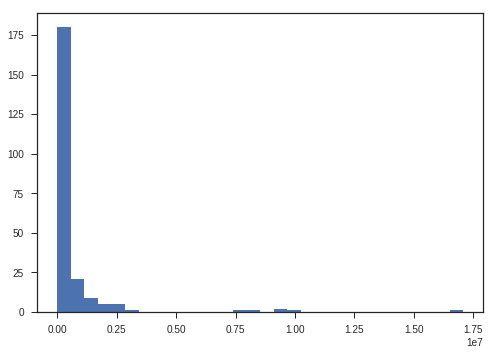

In [32]:
plt.hist(data['Area (sq. mi.)'], 30)
plt.show()

In [24]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Area (sq. mi.)']])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


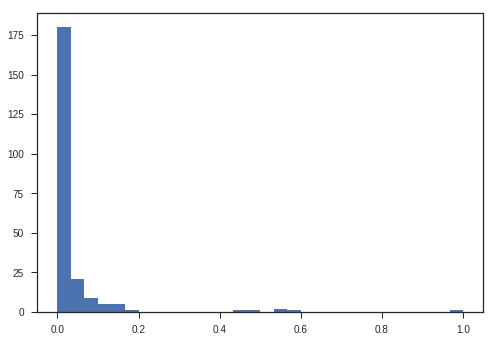

In [31]:
plt.hist(sc1_data, 30)
plt.show()

 Масштабирование данных на основе Z-оценки - StandardScaler

In [34]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['Area (sq. mi.)']])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


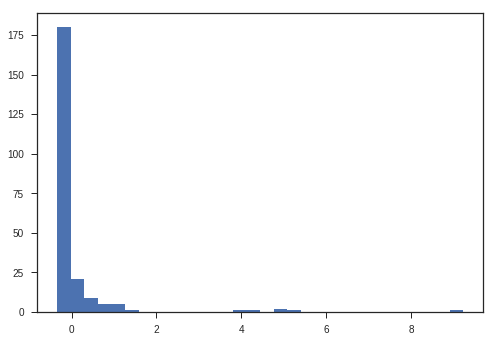

In [35]:
plt.hist(sc2_data, 30)
plt.show()

#Нормализация данных

In [0]:
sc3 = Normalizer()
sc3_data = sc3.fit_transform(data[['Area (sq. mi.)']])

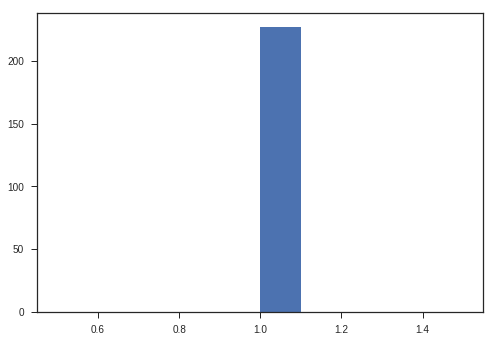

In [40]:
plt.hist(sc3_data, 10)
plt.show()